In [2]:
import pandas as pd
import numpy as np


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

<h4> Same analysis, but on a filtered set of data, resulting in a marginally reduced accuracy.<h4>

In [4]:
df2 = pd.read_csv('Materials_With_AtLeast_OneMagneticElement.csv')

In [17]:
# Separate features and target
numerical_columns = df2.select_dtypes(include=[np.number]).columns.tolist()
#categorical columns with low cardinality
extra_cols = ['is_gap_direct', 'is_stable']
selected_cols = numerical_columns + [col for col in extra_cols if col in df2.columns]
X2 = df2[selected_cols]
y2 = df2['ordering']


# Convert categorical features to numeric using one-hot encoding
X2_encoded = pd.get_dummies(X2)

X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2_encoded, y2, test_size=0.2, random_state=42, stratify=y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.25, stratify=y2_temp, random_state=42)

imputer = SimpleImputer(strategy='mean')
X2_train_imputed = imputer.fit_transform(X2_train)
X2_val_imputed = imputer.transform(X2_val)

# Standardize features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train_imputed)
X2_val_scaled = scaler.transform(X2_val_imputed)


# Logistic regression with 4-fold cross-validation
clf2 = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42)
scores = cross_val_score(clf2, X2_train_scaled, y2_train, cv=4, scoring='accuracy')

print(f"Cross-validated accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

Cross-validated accuracy scores: [0.42437811 0.40432944 0.41801443 0.41179398]
Mean accuracy: 0.415


In [20]:
# Fit on full training set and evaluate on validation set
clf2.fit(X2_train_scaled, y2_train)
val_accuracy = clf2.score(X2_val_scaled, y2_val)
print(f"Val set accuracy: {val_accuracy:.3f}")

Val set accuracy: 0.415


Classification Report:
              precision    recall  f1-score   support

         AFM       0.08      0.61      0.14       168
          FM       0.68      0.27      0.38      2553
         FiM       0.21      0.54      0.30       545
          NM       0.71      0.55      0.62      2094

    accuracy                           0.42      5360
   macro avg       0.42      0.49      0.36      5360
weighted avg       0.62      0.42      0.46      5360



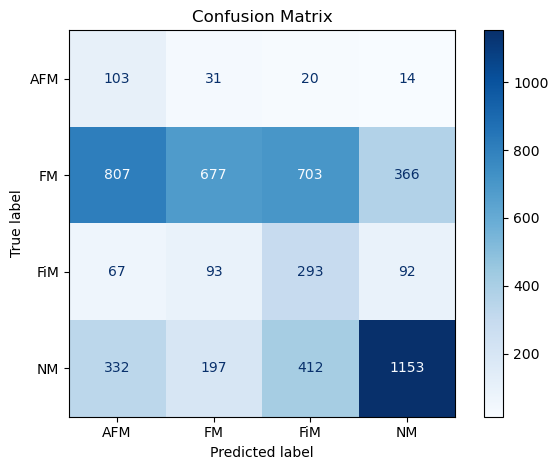

In [25]:
# Predict on the val set
y2_pred = clf2.predict(X2_val_scaled)
print("Classification Report:")
print(classification_report(y2_val, y2_pred, target_names=clf2.classes_))

# Create confusion matrix
cm = confusion_matrix(y2_val, y2_pred, labels=clf2.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()